In [3]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm

In [10]:
# Step 1: Load and Normalize Dataset
def load_qmnist_data():
    """Load QMNIST dataset with normalization."""
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Normalize dataset
    ])
    train_dataset = datasets.QMNIST(root='data', train=True, transform=transform, download=True)
    test_dataset = datasets.QMNIST(root='data', train=False, transform=transform, download=True)
    return train_dataset, test_dataset

In [5]:
# Step 2: Define Model Using Class
class SimpleNN(nn.Module):
    """Define a simple neural network as a class."""
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
# Step 3: Train Model with tqdm
def train_model(model, train_loader, test_loader, epochs=5, lr=0.001):
    """Train the model and plot accuracy/loss."""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_loss, test_loss = [], []
    train_acc, test_acc = [], []

    for epoch in range(epochs):
        # Training phase with tqdm
        model.train()
        running_loss, correct = 0.0, 0
        # Wrap the train_loader with tqdm for progress bar
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs} - Training", ncols=100):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

        train_loss.append(running_loss / len(train_loader))
        train_acc.append(correct / len(train_loader.dataset))

        # Validation phase with tqdm
        model.eval()
        running_loss, correct = 0.0, 0
        # Wrap the test_loader with tqdm for progress bar
        with torch.no_grad():
            for images, labels in tqdm(test_loader, desc=f"Epoch {epoch + 1}/{epochs} - Validation", ncols=100):
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()

        test_loss.append(running_loss / len(test_loader))
        test_acc.append(correct / len(test_loader.dataset))

        # Print the epoch results
        print(f"Epoch {epoch + 1}/{epochs} -> Train Loss: {train_loss[-1]:.4f}, Test Loss: {test_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Test Acc: {test_acc[-1]:.4f}")

    # Plot results
    plot_metrics(train_loss, test_loss, train_acc, test_acc)

    return model

In [7]:
def plot_metrics(train_loss, test_loss, train_acc, test_acc):
    """Plot training and validation loss/accuracy."""
    epochs = range(1, len(train_loss) + 1)
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="Train Loss")
    plt.plot(epochs, test_loss, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label="Train Accuracy")
    plt.plot(epochs, test_acc, label="Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.legend()

    plt.show()

In [9]:
# Step 4: Model Evaluation
def evaluate_model(model, data_loader, class_names):
    """Evaluate model performance."""
    model.eval()
    all_labels, all_preds = [], []

    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    # Classification report
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

In [11]:
# Main Execution
train_dataset, test_dataset = load_qmnist_data()

In [12]:
# DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Initialize model
model = SimpleNN()

Epoch 1/5 - Validation: 100%|█████████████████████████████████████| 938/938 [00:10<00:00, 93.14it/s]


Epoch 1/5 -> Train Loss: 0.3984, Test Loss: 0.2530, Train Acc: 0.8823, Test Acc: 0.9215


Epoch 2/5 - Validation: 100%|█████████████████████████████████████| 938/938 [00:10<00:00, 86.78it/s]


Epoch 2/5 -> Train Loss: 0.1877, Test Loss: 0.1565, Train Acc: 0.9424, Test Acc: 0.9515


Epoch 3/5 - Validation: 100%|█████████████████████████████████████| 938/938 [00:10<00:00, 88.32it/s]


Epoch 3/5 -> Train Loss: 0.1354, Test Loss: 0.1478, Train Acc: 0.9573, Test Acc: 0.9539


Epoch 4/5 - Validation: 100%|█████████████████████████████████████| 938/938 [00:10<00:00, 86.96it/s]


Epoch 4/5 -> Train Loss: 0.1099, Test Loss: 0.1156, Train Acc: 0.9658, Test Acc: 0.9643


Epoch 5/5 - Validation: 100%|█████████████████████████████████████| 938/938 [00:10<00:00, 91.20it/s]


Epoch 5/5 -> Train Loss: 0.0922, Test Loss: 0.1124, Train Acc: 0.9714, Test Acc: 0.9666


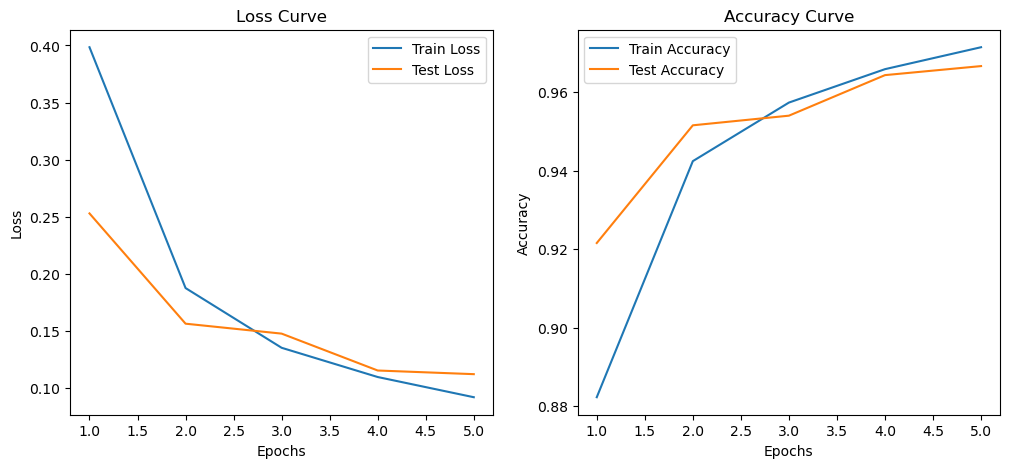

In [14]:
# Train model
model = train_model(model, train_loader, test_loader, epochs=5)

In [15]:
# Save model
torch.save(model.state_dict(), 'qmnist.pth')
print("Model saved as 'qmnist.pth'")

Model saved as 'qmnist.pth'


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5952
           1       0.97      0.99      0.98      6791
           2       0.97      0.96      0.97      6026
           3       0.96      0.96      0.96      6084
           4       0.96      0.98      0.97      5780
           5       0.94      0.96      0.95      5454
           6       0.98      0.97      0.97      5957
           7       0.96      0.98      0.97      6231
           8       0.96      0.95      0.95      5890
           9       0.97      0.93      0.95      5835

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



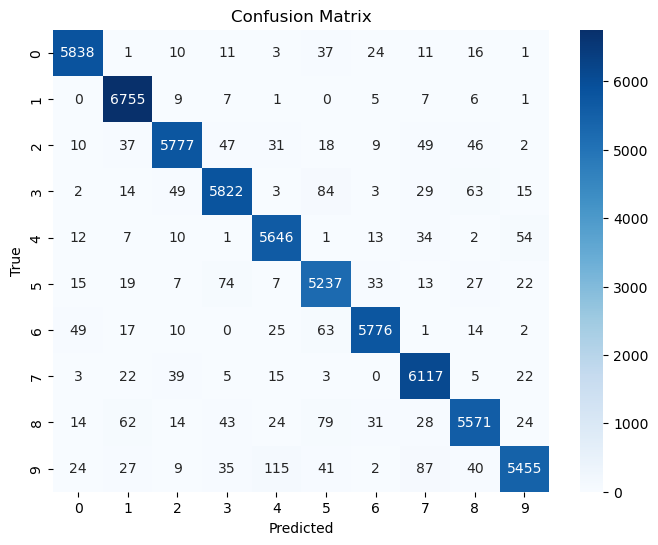

In [16]:
evaluate_model(model, test_loader, class_names=[str(i) for i in range(10)])

# Adding Task vector

In [17]:
# Load the task vector
task_vector_path = 'task_vector.pth'  # Path to the saved task vector
task_vector = torch.load(task_vector_path)

# Add task vector to FashionMNIST model weights
qmnist_model = model.state_dict()
for key in task_vector.keys():
    if key in qmnist_model:
        qmnist_model[key] += task_vector[key]
model.load_state_dict(qmnist_model)

<All keys matched successfully>

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5952
           1       0.98      0.99      0.98      6791
           2       0.97      0.96      0.97      6026
           3       0.96      0.95      0.96      6084
           4       0.96      0.98      0.97      5780
           5       0.95      0.96      0.95      5454
           6       0.98      0.97      0.98      5957
           7       0.96      0.98      0.97      6231
           8       0.96      0.95      0.95      5890
           9       0.98      0.93      0.95      5835

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



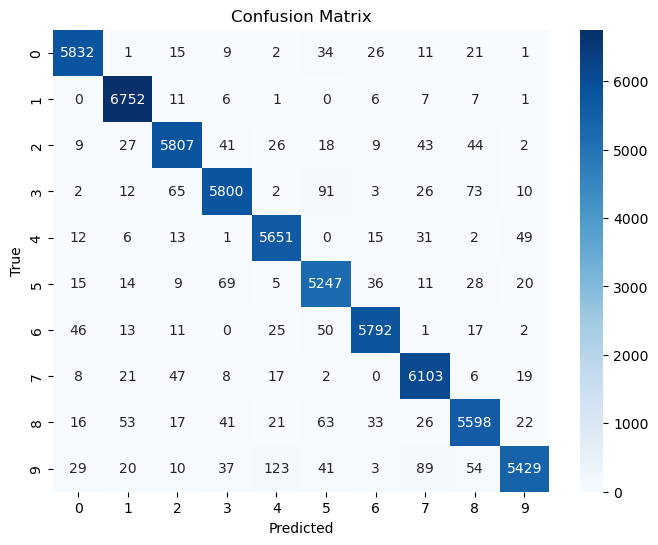

In [18]:
evaluate_model(model, test_loader, class_names=[str(i) for i in range(10)])

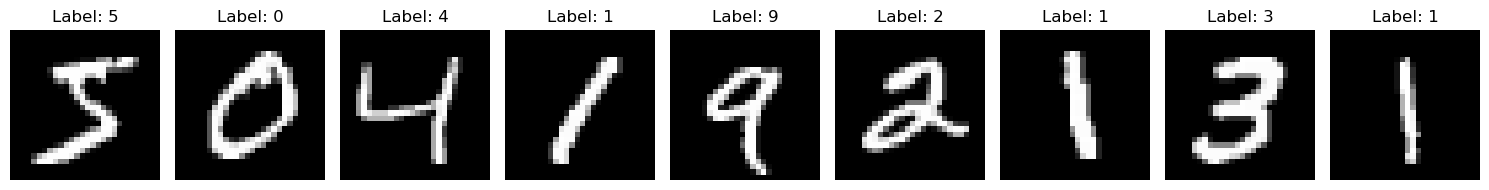

In [20]:
# Function to display images
def visualize_qmnist(dataset, num_images=9):
    """Visualize a few images from the QMNIST dataset."""
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        # Select a random image
        image, label = dataset[i]
        # Reverse normalization for visualization (if normalized earlier)
        image = image.squeeze().numpy()
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the first 9 images
visualize_qmnist(train_dataset, num_images=9)

In [22]:
import torch

# Load your trained model
model = SimpleNN()
model.load_state_dict(torch.load("qmnist.pth"))
model.eval()




SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [23]:
# Convert to TorchScript format
scripted_model = torch.jit.script(model)
scripted_model.save("qmnist_mobile.pt")